In [45]:
# import the necessary packages
import argparse
import cv2
import numpy as np
from matplotlib import pyplot as plt

## https://stackoverflow.com/questions/41138000/fit-quadrilateral-tetragon-to-a-blob

# construct the argument parser and parse the arguments

threshold = 128


# load the image and convert it to grayscale
image = cv2.imread('../raw_data/mercari_images/test3.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# initialize the list of threshold methods
methods = [
    ("THRESH_BINARY", cv2.THRESH_BINARY),
    ("THRESH_BINARY_INV", cv2.THRESH_BINARY_INV),
    ("THRESH_TRUNC", cv2.THRESH_TRUNC),
    ("THRESH_TOZERO", cv2.THRESH_TOZERO),
    ("THRESH_TOZERO_INV", cv2.THRESH_TOZERO_INV)]
# loop over the threshold methods




In [38]:
# https://web.archive.org/web/20111108065352/https://www.cs.mun.ca/~rod/2500/notes/numpy-arrays/numpy-arrays.html
# line segment intersection using vectors
# see Computer Graphics by F.S. Hill
#

def perp( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

# line segment a given by endpoints a1, a2
# line segment b given by endpoints b1, b2
# return 
def seg_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = perp(da)
    denom = np.dot( dap, db)
    num = np.dot( dap, dp )
    return (num / denom.astype(float))*db + b1




In [39]:
image = cv2.imread('../raw_data/mercari_images/test.jpg')

In [46]:
import cv2
import numpy as np
#https://stackoverflow.com/questions/42721213/python-opencv-extrapolating-the-largest-rectangle-off-of-a-set-of-contour-poin


def clahe(img, clip_limit=2.0, grid_size=(8,8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    return clahe.apply(img)

# HSV thresholding to get rid of as much background as possible
hsv = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2HSV)
lower_blue = np.array([0, 0, 120])
upper_blue = np.array([180, 38, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
result = cv2.bitwise_and(image,image, mask=mask)
b, g, r = cv2.split(result)
g = clahe(g, 5, (3, 3))


# Adaptive Thresholding to isolate the bed
img_blur = cv2.blur(g, (10, 10))
img_th = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 51, 2)

contours, hierarchy = cv2.findContours(img_th,
                                           cv2.RETR_CCOMP,
                                            cv2.CHAIN_APPROX_SIMPLE)


(2, 2)

In [4]:
contours = [contour for contour in contours if cv2.contourArea(contour) >= 4000]
len(contours)

10

In [5]:
for i in range(len(hull)): 
    print(f'hull {cv.contourArea(hull[i])}: cnt {cv.contourArea(contours[i])}')

NameError: name 'hull' is not defined

In [5]:


hulls = []
 
# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hulls.append(cv2.convexHull(contours[i], False))

hulls = [h for h in hulls if cv2.contourArea(h) >= 5000]
    
rs_hull = [np.squeeze(h,axis=1) for h in hulls]
len(rs_hull)


10

In [ ]:
quads = []

for h in rs_hull: 
    x,y=np.split(h,2,axis=1)
    
    ## gets the maximum point in 8 cardinal directions 
    ## 4 cardinal directions
    max_e = int(max(x))
    max_w = int(min(x))
    max_n = int(max(y))
    max_s = int(min(y))
        
    max_e_ = [max_e, int(min(y[np.where(x == max_e)[0]]))]
    max_s_ = [int(min(x[np.where(y == max_s)[0]])), max_s]
    max_w_ = [max_w, int(min(y[np.where(x == max_w)[0]]))]
    max_n_ = [int(min(x[np.where(y == max_n)[0]])), max_n]
    
    ## diagonal cardinal directions
    nw = -x+y
    ne = x+y
    se = x-y
    sw = -x-y
    
    max_nw = int(max(nw))
    max_ne = int(max(ne))
    max_se = int(max(se))
    max_sw = int(max(sw))
    
    max_nw_i = np.argmax(nw == max_nw)
    max_ne_i = np.argmax(ne == max_ne)
    max_se_i = np.argmax(se == max_se)
    max_sw_i = np.argmax(sw == max_sw)
    
    max_nw_ = [int(x[max_nw_i]), int(y[max_nw_i])] 
    max_ne_ = [int(x[max_ne_i]), int(y[max_ne_i])] 
    max_se_ = [int(x[max_se_i]), int(y[max_se_i])] 
    max_sw_ = [int(x[max_sw_i]), int(y[max_sw_i])] 
    
    ## creates an onctagon that binds the hull 
    oct_points = [max_w_, max_nw_, max_n_, max_ne_, max_e_, max_se_, max_s_, max_sw_]
    oct_points = np.array(oct_points).reshape((-1,1,2)).astype(np.int32)
    
    ## get distances between sequential points 
    dists = []
    for i in range(-1,7):
        dists.append(np.linalg.norm(oct_points[i]-oct_points[i+1]))
    
    ## find longest lines by index (i-1, i)
    ind = np.argpartition(dists, -4)[-4:]
    ind.sort()
    
    ## get pairs of points forming longest lines 
    ind_pair = []
    for i in ind: 
        ind_pair.append([(i-1) % 8, i]) 
    ind_pair

    ## get intersections of longest lines in bounding octagon
    ## forming a min area bounding quadrilateral 
    quad_points = []
    for i in range(-1,3):
        p1 = oct_points[ind_pair[i][0]][0]
        p2 = oct_points[ind_pair[i][1]][0]
        p3 = oct_points[ind_pair[i+1][0]][0]
        p4 = oct_points[ind_pair[i+1][1]][0]
    
        quad_points.append(seg_intersect(p1,p2,p3,p4))



    quad = np.stack(quad_points, axis=0).reshape((-1,1,2)).astype(np.int32)
    quads.append(quad)
    
cv2.drawContours(image,quads,-1,(0,255,255),5)
plt.clf()
plt.figure(figsize=(8,8))
plt.imshow(image);

In [17]:
# to demonstrate the impact of contour approximation, let's loop
# over a number of epsilon sizes
eps = 0.010
    # approximate the contour
reduced_contours = [] 
l = []

## reduce all hulls 
for h in hulls:     
    peri = cv2.arcLength(h, True)
    reduced_contour = cv2.approxPolyDP(h, eps * peri, True)
    reduced_contours.append(reduced_contour)


[(29, 13), (30, 24), (31, 25), (32, 25), (20, 7), (20, 15), (33, 16), (21, 14), (4, 4), (44, 14)]
0.001
[(29, 8), (30, 12), (31, 11), (32, 11), (20, 5), (20, 6), (33, 7), (21, 7), (4, 4), (44, 4)]
0.0064444444444444445
[(29, 8), (30, 7), (31, 7), (32, 8), (20, 5), (20, 6), (33, 6), (21, 5), (4, 4), (44, 4)]
0.01188888888888889
[(29, 7), (30, 7), (31, 6), (32, 8), (20, 4), (20, 4), (33, 5), (21, 4), (4, 4), (44, 4)]
0.017333333333333333
[(29, 7), (30, 6), (31, 6), (32, 8), (20, 4), (20, 4), (33, 5), (21, 3), (4, 4), (44, 4)]
0.02277777777777778
[(29, 7), (30, 5), (31, 5), (32, 5), (20, 4), (20, 4), (33, 5), (21, 3), (4, 4), (44, 4)]
0.028222222222222225
[(29, 7), (30, 5), (31, 5), (32, 5), (20, 4), (20, 3), (33, 5), (21, 3), (4, 4), (44, 4)]
0.033666666666666664
[(29, 5), (30, 4), (31, 4), (32, 4), (20, 4), (20, 3), (33, 5), (21, 3), (4, 4), (44, 4)]
0.03911111111111111
[(29, 5), (30, 3), (31, 4), (32, 4), (20, 4), (20, 3), (33, 4), (21, 3), (4, 4), (44, 4)]
0.04455555555555556
[(29, 5)

In [ ]:
    oct_points = [max_w_, max_nw_, max_n_, max_ne_, max_e_, max_se_, max_s_, max_sw_]
    oct_points = np.array(oct_points).reshape((-1,1,2)).astype(np.int32)
    
    ## get distances between sequential points 
    dists = []
    for i in range(-1,7):
        print(i)
        dists.append(np.linalg.norm(oct_points[i]-oct_points[i+1]))
    
    ## find longest lines by index (i-1, i)
    ind = np.argpartition(dists, -4)[-4:]
    ind.sort()

In [ ]:
ind
ind_pair = []
for i in ind: 
    ind_pair.append([(i-1) % 8, i]) 
ind_pair

In [ ]:
quad_points = []
for i in range(-1,3):
    p1 = oct_points[ind_pair[i][0]][0]
    p2 = oct_points[ind_pair[i][1]][0]
    p3 = oct_points[ind_pair[i+1][0]][0]
    p4 = oct_points[ind_pair[i+1][1]][0]
    
    quad_points.append(seg_intersect(p1,p2,p3,p4))
    
quad_points

arr = np.stack(quad_points, axis=0).reshape((-1,1,2)).astype(np.int32)

In [ ]:

arr, quad_points

In [ ]:
cv2.drawContours(image,[arr],0,(0,255,255),5)
plt.figure(figsize=(8,8))
plt.imshow(image)

In [ ]:
hull[0]

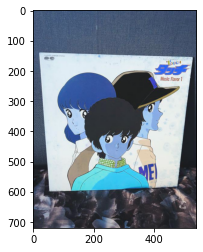

In [1]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('../raw_data/mercari_images/test.jpg')
plt.imshow(image)

In [1]:
contours

NameError: name 'contours' is not defined

In [12]:
size = 500
dest = np.float32([(size, 0),
                  (0, 0),
                  (size, size),
                  (0, size)])

In [15]:
contours

NameError: name 'contour' is not defined

In [48]:
quad = contours[4].squeeze(axis=1)
quad

array([[908, 928],
       [908, 937],
       [909, 938],
       [930, 938],
       [931, 937],
       [931, 928]], dtype=int32)

In [50]:
    x, y = np.split(quad,2,axis=1)
    print(x)
    print(y)
    top_2_x_index = np.argsort(x,axis=0)[-2:]
    top_y_index = int(top_2_x_index[np.argmax(y[top_2_x_index])])
    print(quad)
    print(f'top 2 x {top_2_x_index} top y {top_y_index}')
    oriented_quad = np.concatenate((quad[top_y_index:],quad[:top_y_index]), axis=0)

    print(oriented_quad)
    print('hello')

[[908]
 [908]
 [909]
 [930]
 [931]
 [931]]
[[928]
 [937]
 [938]
 [938]
 [937]
 [928]]
[[908 928]
 [908 937]
 [909 938]
 [930 938]
 [931 937]
 [931 928]]
top 2 x [[4]
 [5]] top y 4
[[931 937]
 [931 928]
 [908 928]
 [908 937]
 [909 938]
 [930 938]]
hello


In [51]:
np.argy[top_2_x_index]

array([[[937]],

       [[928]]], dtype=int32)